In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch
from torch.utils.data import DataLoader

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt

In [2]:
x = np.load('./final data/train_features.npy')
y = np.load('./final data/train_targets.npy')
y = pd.get_dummies(y).values

In [3]:
# TRAIN TEST SPLIT

idx_arr = np.array(range(0,3400))

test_idx = np.random.choice(range(idx_arr.shape[0]), size=(700,), replace=False)
train_idx = [x for x in idx_arr if x not in test_idx]

X_train = []
y_train = []
X_test = []
y_test = []

for i in train_idx:
    X_train.append(x[i])
    y_train.append(y[i]) 
    
for i in test_idx:
    X_test.append(x[i])
    y_test.append(y[i]) 
    
X_train,X_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)
    

In [6]:
model = Sequential()
model.add(LSTM(100, input_shape=(80,3)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               41600     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 17)                1717      
                                                                 
Total params: 53,417
Trainable params: 53,417
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

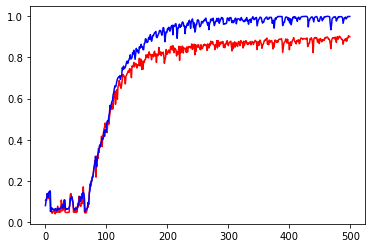

In [24]:
plt.plot(val_accuracy,c="r")
plt.plot(train_accuracy,c="b")

In [26]:
model.save('500epoch/')

INFO:tensorflow:Assets written to: 500epoch/assets


INFO:tensorflow:Assets written to: 500epoch/assets
